In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from collections import Counter

df = pd.read_csv('IMDB Dataset.csv')

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


In [2]:

print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\n")


print("Informações sobre o DataFrame:")
df.info()
print("\n")

print("Valores nulos por coluna:")
print(df.isnull().sum())
print("\n")

num_duplicatas = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Número de duplicatas encontradas e removidas: {num_duplicatas}")
print(f"Número de linhas após a remoção de duplicatas: {len(df)}")

Primeiras 5 linhas do DataFrame:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Valores nulos por coluna:
review       0
sentiment    0
dtype: int64


Número de duplicatas encontradas e removidas: 418
Número de linhas após a remoção de duplicatas: 49582


Contagem de avaliações por sentimento:
sentiment
positive    24884
negative    24698
Name: count, dtype: int64




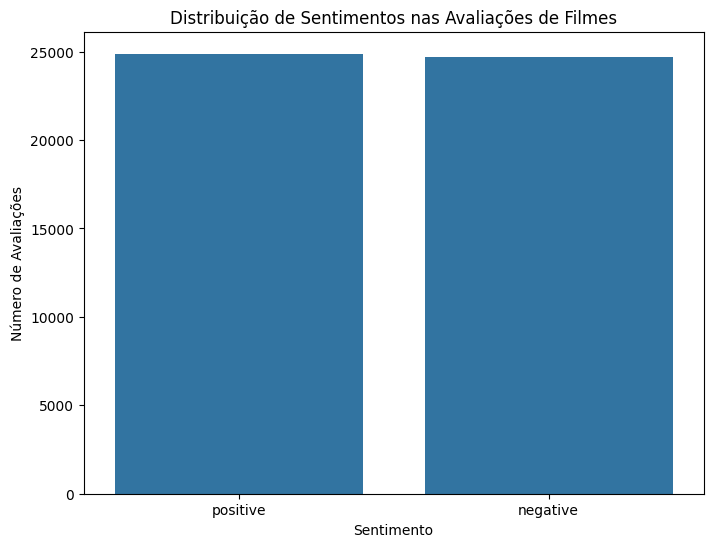

In [3]:

sentiment_counts = df['sentiment'].value_counts()
print("Contagem de avaliações por sentimento:")
print(sentiment_counts)
print("\n")


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribuição de Sentimentos nas Avaliações de Filmes')
plt.xlabel('Sentimento')
plt.ylabel('Número de Avaliações')
plt.show()

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

def count_words(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words and len(word) > 2]
    return Counter(filtered_words).most_common(20)

positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']


all_positive_text = ' '.join(positive_reviews['review'])
all_negative_text = ' '.join(negative_reviews['review'])


top_positive_words = count_words(all_positive_text)
top_negative_words = count_words(all_negative_text)


print("Top 20 palavras mais comuns em avaliações positivas:")
print(top_positive_words)
print("\n")

print("Top 20 palavras mais comuns em avaliações negativas:")
print(top_negative_words)

Top 20 palavras mais comuns em avaliações positivas:
[('film', 39282), ('movie', 35844), ('one', 25990), ('like', 17088), ('good', 14336), ('great', 12659), ('story', 12361), ('see', 11879), ('time', 11733), ('well', 11082), ('also', 10672), ('really', 10663), ('would', 10329), ('even', 9438), ('much', 9008), ('first', 8917), ('films', 8434), ('love', 8382), ('people', 8357), ('best', 8293)]


Top 20 palavras mais comuns em avaliações negativas:
[('movie', 47018), ('film', 34652), ('one', 24654), ('like', 21583), ('even', 14936), ('good', 14034), ('bad', 13970), ('would', 13497), ('really', 12118), ('time', 11346), ('see', 10451), ('dont', 10144), ('get', 9896), ('much', 9775), ('story', 9594), ('people', 9019), ('could', 8924), ('make', 8914), ('made', 8303), ('movies', 8296)]


In [6]:
positive_df = pd.DataFrame(top_positive_words, columns=['palavra', 'contagem'])

negative_df = pd.DataFrame(top_negative_words, columns=['palavra', 'contagem'])

print("DataFrame de palavras positivas:")
print(positive_df)
print("\n")
print("DataFrame de palavras negativas:")
print(negative_df)

DataFrame de palavras positivas:
   palavra  contagem
0     film     39282
1    movie     35844
2      one     25990
3     like     17088
4     good     14336
5    great     12659
6    story     12361
7      see     11879
8     time     11733
9     well     11082
10    also     10672
11  really     10663
12   would     10329
13    even      9438
14    much      9008
15   first      8917
16   films      8434
17    love      8382
18  people      8357
19    best      8293


DataFrame de palavras negativas:
   palavra  contagem
0    movie     47018
1     film     34652
2      one     24654
3     like     21583
4     even     14936
5     good     14034
6      bad     13970
7    would     13497
8   really     12118
9     time     11346
10     see     10451
11    dont     10144
12     get      9896
13    much      9775
14   story      9594
15  people      9019
16   could      8924
17    make      8914
18    made      8303
19  movies      8296


C:\Users\pri\AppData\Local\Temp\ipykernel_14712\3554257949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'contagem', y= 'palavra', data=positive_df, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

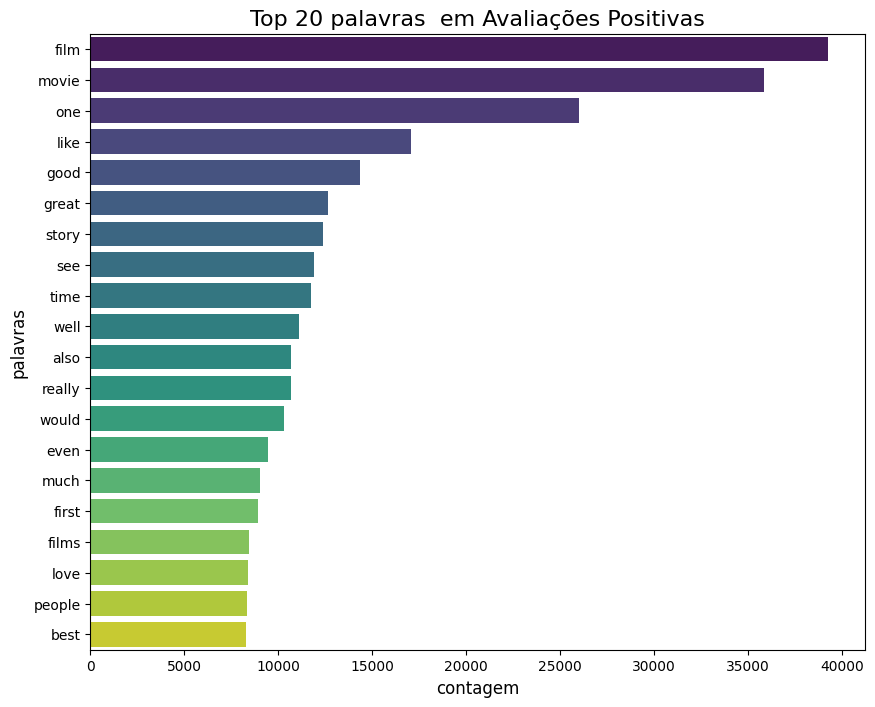

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x= 'contagem', y= 'palavra', data=positive_df, palette='viridis')

plt.title('Top 20 palavras  em Avaliações Positivas', fontsize=16)
plt.xlabel('contagem', fontsize=12)
plt.ylabel('palavras', fontsize=12)

plt.show

C:\Users\pri\AppData\Local\Temp\ipykernel_14712\2964261062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'contagem', y= 'palavra', data=negative_df, palette='magma')


<function matplotlib.pyplot.show(close=None, block=None)>

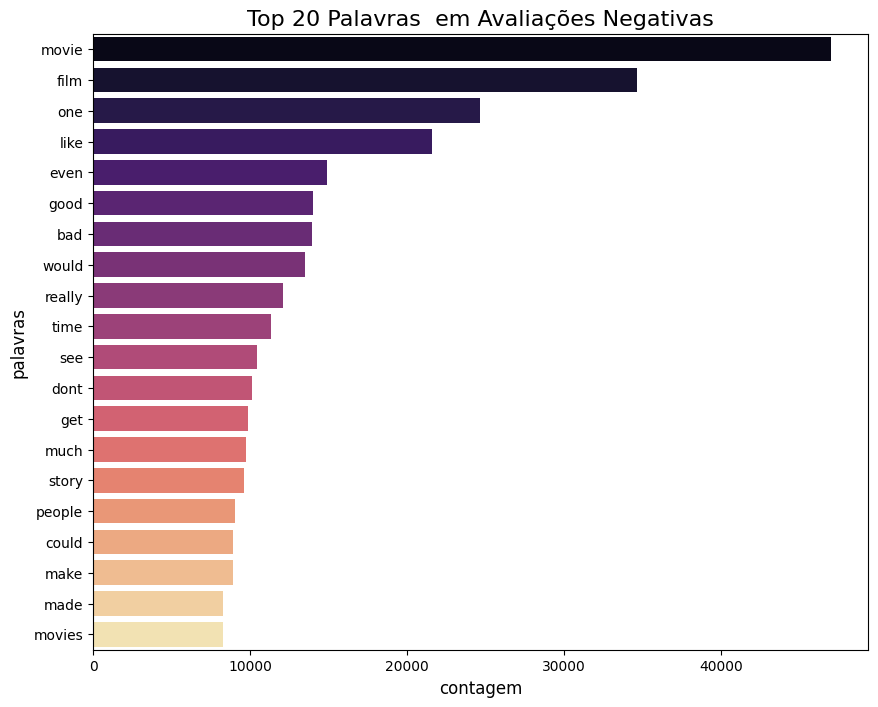

In [8]:
plt.figure(figsize=(10, 8))
sns.barplot(x= 'contagem', y= 'palavra', data=negative_df, palette='magma')
plt.title('Top 20 Palavras  em Avaliações Negativas', fontsize=16)
plt.xlabel('contagem', fontsize=12)
plt.ylabel('palavras',fontsize=12)

plt.show